# House Prices - Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting

## Load libraries

In [2]:
import numpy as np
import pandas as pd
# option for pd to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import scipy.stats as stats


## Load data

In [3]:
# load test.csv and train.csv
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

## Data Understanding

### Describe data

In [4]:
display(train.head(), train.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)

In [5]:
display(test.head(), test.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


(1459, 80)

In [6]:
# Create a metadata dataframe that contains information about the input dataframe
def metadata(df):
    columns_list = list(df.columns.values)
    metadata = pd.DataFrame(columns_list, columns=['col_name'])

    # Data types
    metadata['data_type'] = [i for i in df.dtypes.astype(str)]

    # Missing values
    metadata['missing_values'] = [i for i in df.isnull().sum()]

    # Missing values percentage in two digits number
    metadata['missing_values_percentage'] = [round(i*100,2) for i in df.isnull().sum() / df.shape[0]]
    
    # Number of unique values
    metadata['unique_values'] = [i for i in df.nunique()]

    # Number of unique values percentage
    metadata['unique_values_percentage'] = [round(i*100,2) for i in df.nunique() / df.shape[0]]

    # Basic statistics for interval columns
    interval_columns = [col for col in columns_list if df[col].dtype != 'object']
    desc_interval = df[interval_columns].agg(['min', 'max', 'std']).transpose().reset_index().rename(columns={'index': 'col_name'})
    metadata = metadata.merge(desc_interval, on='col_name', how='left')

    return metadata

In [7]:
metadata(train)

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,Id,int64,0,0.00,1460,100.00,1.0,1460.0,421.610009
1,MSSubClass,int64,0,0.00,15,1.03,20.0,190.0,42.300571
2,MSZoning,object,0,0.00,5,0.34,NaN,NaN,NaN
3,LotFrontage,float64,259,17.74,110,7.53,21.0,313.0,24.284752
4,LotArea,int64,0,0.00,1073,73.49,1300.0,215245.0,9981.264932
5,Street,object,0,0.00,2,0.14,NaN,NaN,NaN
6,Alley,object,1369,93.77,2,0.14,NaN,NaN,NaN
7,LotShape,object,0,0.00,4,0.27,NaN,NaN,NaN
8,LandContour,object,0,0.00,4,0.27,NaN,NaN,NaN
9,Utilities,object,0,0.00,2,0.14,NaN,NaN,NaN


In [8]:
metadata(test)

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,Id,int64,0,0.00,1459,100.00,1461.0,2919.0,421.321334
1,MSSubClass,int64,0,0.00,16,1.10,20.0,190.0,42.746880
2,MSZoning,object,4,0.27,5,0.34,NaN,NaN,NaN
3,LotFrontage,float64,227,15.56,115,7.88,21.0,200.0,22.376841
4,LotArea,int64,0,0.00,1106,75.81,1470.0,56600.0,4955.517327
5,Street,object,0,0.00,2,0.14,NaN,NaN,NaN
6,Alley,object,1352,92.67,2,0.14,NaN,NaN,NaN
7,LotShape,object,0,0.00,4,0.27,NaN,NaN,NaN
8,LandContour,object,0,0.00,4,0.27,NaN,NaN,NaN
9,Utilities,object,2,0.14,1,0.07,NaN,NaN,NaN


### Check missing values

It is suprising that there are so many missing values in the data. Let's check the data description to see if there is any information about the missing values.

Also somehow test data has more missing values columns than train data.

In [9]:
train_meta = metadata(train)

# show rows when the missing_values is not 0 in a descending order
train_missing = train_meta[train_meta['missing_values'] != 0].sort_values(by='missing_values', ascending=False)

display(train_missing, train_missing.shape)

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
72,PoolQC,object,1453,99.52,3,0.21,NaN,NaN,NaN
74,MiscFeature,object,1406,96.30,4,0.27,NaN,NaN,NaN
6,Alley,object,1369,93.77,2,0.14,NaN,NaN,NaN
73,Fence,object,1179,80.75,4,0.27,NaN,NaN,NaN
25,MasVnrType,object,872,59.73,3,0.21,NaN,NaN,NaN
57,FireplaceQu,object,690,47.26,5,0.34,NaN,NaN,NaN
3,LotFrontage,float64,259,17.74,110,7.53,21.0,313.0,24.284752
58,GarageType,object,81,5.55,6,0.41,NaN,NaN,NaN
59,GarageYrBlt,float64,81,5.55,97,6.64,1900.0,2010.0,24.689725
60,GarageFinish,object,81,5.55,3,0.21,NaN,NaN,NaN


(19, 9)

In [10]:
test_meta = metadata(test)

# show rows when the missing_values is not 0 in a descending order
test_missing = test_meta[test_meta['missing_values'] != 0].sort_values(by='missing_values', ascending=False)

display(test_missing, test_missing.shape)

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
72,PoolQC,object,1456,99.79,2,0.14,NaN,NaN,NaN
74,MiscFeature,object,1408,96.50,3,0.21,NaN,NaN,NaN
6,Alley,object,1352,92.67,2,0.14,NaN,NaN,NaN
73,Fence,object,1169,80.12,4,0.27,NaN,NaN,NaN
25,MasVnrType,object,894,61.27,3,0.21,NaN,NaN,NaN
57,FireplaceQu,object,730,50.03,5,0.34,NaN,NaN,NaN
3,LotFrontage,float64,227,15.56,115,7.88,21.0,200.0,22.376841
64,GarageCond,object,78,5.35,5,0.34,NaN,NaN,NaN
59,GarageYrBlt,float64,78,5.35,97,6.65,1895.0,2207.0,26.431175
63,GarageQual,object,78,5.35,4,0.27,NaN,NaN,NaN


(33, 9)

In [11]:
# show the rows that in train_missing but not in test_missing
train_missing[~train_missing.index.isin(test_missing.index)]

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
42,Electrical,object,1,0.07,5,0.34,NaN,NaN,NaN


In [12]:
train['Electrical'].value_counts() # Electrical system

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

Only one missing value, which can be easy to explain - that one missing value just happened to be in the traning data.

I will drop this row.

In [13]:
# show the rows that in test_missing but not in train_missing
test_missing[~test_missing.index.isin(train_missing.index)]

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
2,MSZoning,object,4,0.27,5,0.34,NaN,NaN,NaN
47,BsmtFullBath,float64,2,0.14,4,0.27,0.0,3.0,0.530648
48,BsmtHalfBath,float64,2,0.14,3,0.21,0.0,2.0,0.252468
55,Functional,object,2,0.14,7,0.48,NaN,NaN,NaN
9,Utilities,object,2,0.14,1,0.07,NaN,NaN,NaN
61,GarageCars,float64,1,0.07,6,0.41,0.0,5.0,0.775945
62,GarageArea,float64,1,0.07,459,31.46,0.0,1488.0,217.048611
38,TotalBsmtSF,float64,1,0.07,736,50.45,0.0,5095.0,442.898624
53,KitchenQual,object,1,0.07,4,0.27,NaN,NaN,NaN
37,BsmtUnfSF,float64,1,0.07,793,54.35,0.0,2140.0,437.260486


In [14]:
missing_list = test_missing[~test_missing.index.isin(train_missing.index)].loc[:,'col_name'].tolist()

for i in missing_list:
    if test[i].dtype == 'object':
        print(test[i].value_counts())
    elif len(test[i].value_counts()) < 10:
        print(test[i].value_counts())
    else: print(test[i].describe())
    print('\n')

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: count, dtype: int64


BsmtFullBath
0.0    849
1.0    584
2.0     23
3.0      1
Name: count, dtype: int64


BsmtHalfBath
0.0    1364
1.0      91
2.0       2
Name: count, dtype: int64


Functional
Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: count, dtype: int64


Utilities
AllPub    1457
Name: count, dtype: int64


GarageCars
2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: count, dtype: int64


count    1458.000000
mean      472.768861
std       217.048611
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64


count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64


KitchenQual
TA    757
Gd  

All these missing value columns are similar to the 'Electrical' column in the training data. 

In [15]:
# show the rows that in both train_missing and test_missing
train_missing[train_missing.index.isin(test_missing.index)]

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
72,PoolQC,object,1453,99.52,3,0.21,NaN,NaN,NaN
74,MiscFeature,object,1406,96.30,4,0.27,NaN,NaN,NaN
6,Alley,object,1369,93.77,2,0.14,NaN,NaN,NaN
73,Fence,object,1179,80.75,4,0.27,NaN,NaN,NaN
25,MasVnrType,object,872,59.73,3,0.21,NaN,NaN,NaN
57,FireplaceQu,object,690,47.26,5,0.34,NaN,NaN,NaN
3,LotFrontage,float64,259,17.74,110,7.53,21.0,313.0,24.284752
58,GarageType,object,81,5.55,6,0.41,NaN,NaN,NaN
59,GarageYrBlt,float64,81,5.55,97,6.64,1900.0,2010.0,24.689725
60,GarageFinish,object,81,5.55,3,0.21,NaN,NaN,NaN


PoolQC: Pool quality

MiscFeature: Miscellaneous feature not covered in other categories

Alley: Type of alley access to property

Fence: Fence quality

MasVnrType: Masonry veneer type

FireplaceQu: Fireplace quality

LotFrontage: Linear feet of street connected to property

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageQual: Garage quality

GarageCond: Garage condition

BsmtFinType2: Quality of second finished area (if present)

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtCond: General condition of the basement

BsmtQual: Height of the basement

MasVnrArea: Masonry veneer area in square feet

Depends on what kind of models I will use, I will decide how to deal with these missing values.

For example, if I use linear regression, I will need to fill in the missing values.
If it is a tree based model, I can just leave the missing values as they are.

### Visualize data

C:\Users\yuyum\AppData\Local\Temp\ipykernel_27052\3751020781.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], fit=stats.norm)


<Axes: xlabel='SalePrice', ylabel='Density'>

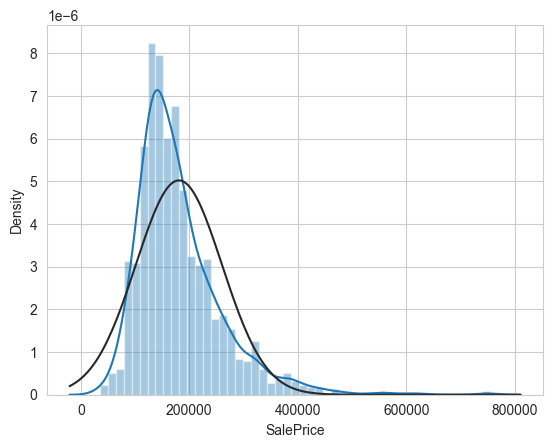

In [16]:
# check if SalePrice is normally distributed

sns.distplot(train['SalePrice'], fit=stats.norm)

'SalePrice' is a little bit skewed. I will log transform it later if I'm using statistical models.

C:\Users\yuyum\AppData\Local\Temp\ipykernel_27052\2251838905.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train['SalePrice']), fit=stats.norm)


<Axes: xlabel='SalePrice', ylabel='Density'>

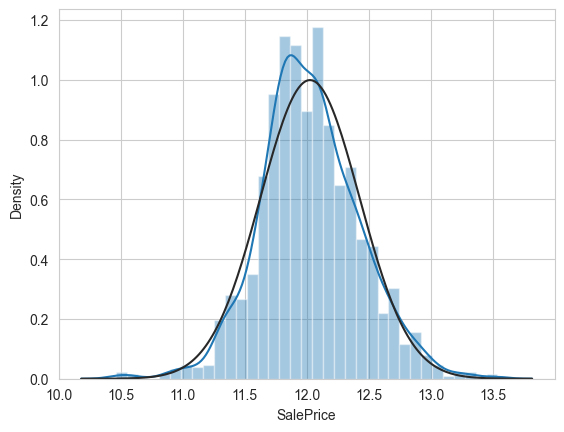

In [17]:
sns.distplot(np.log(train['SalePrice']), fit=stats.norm)

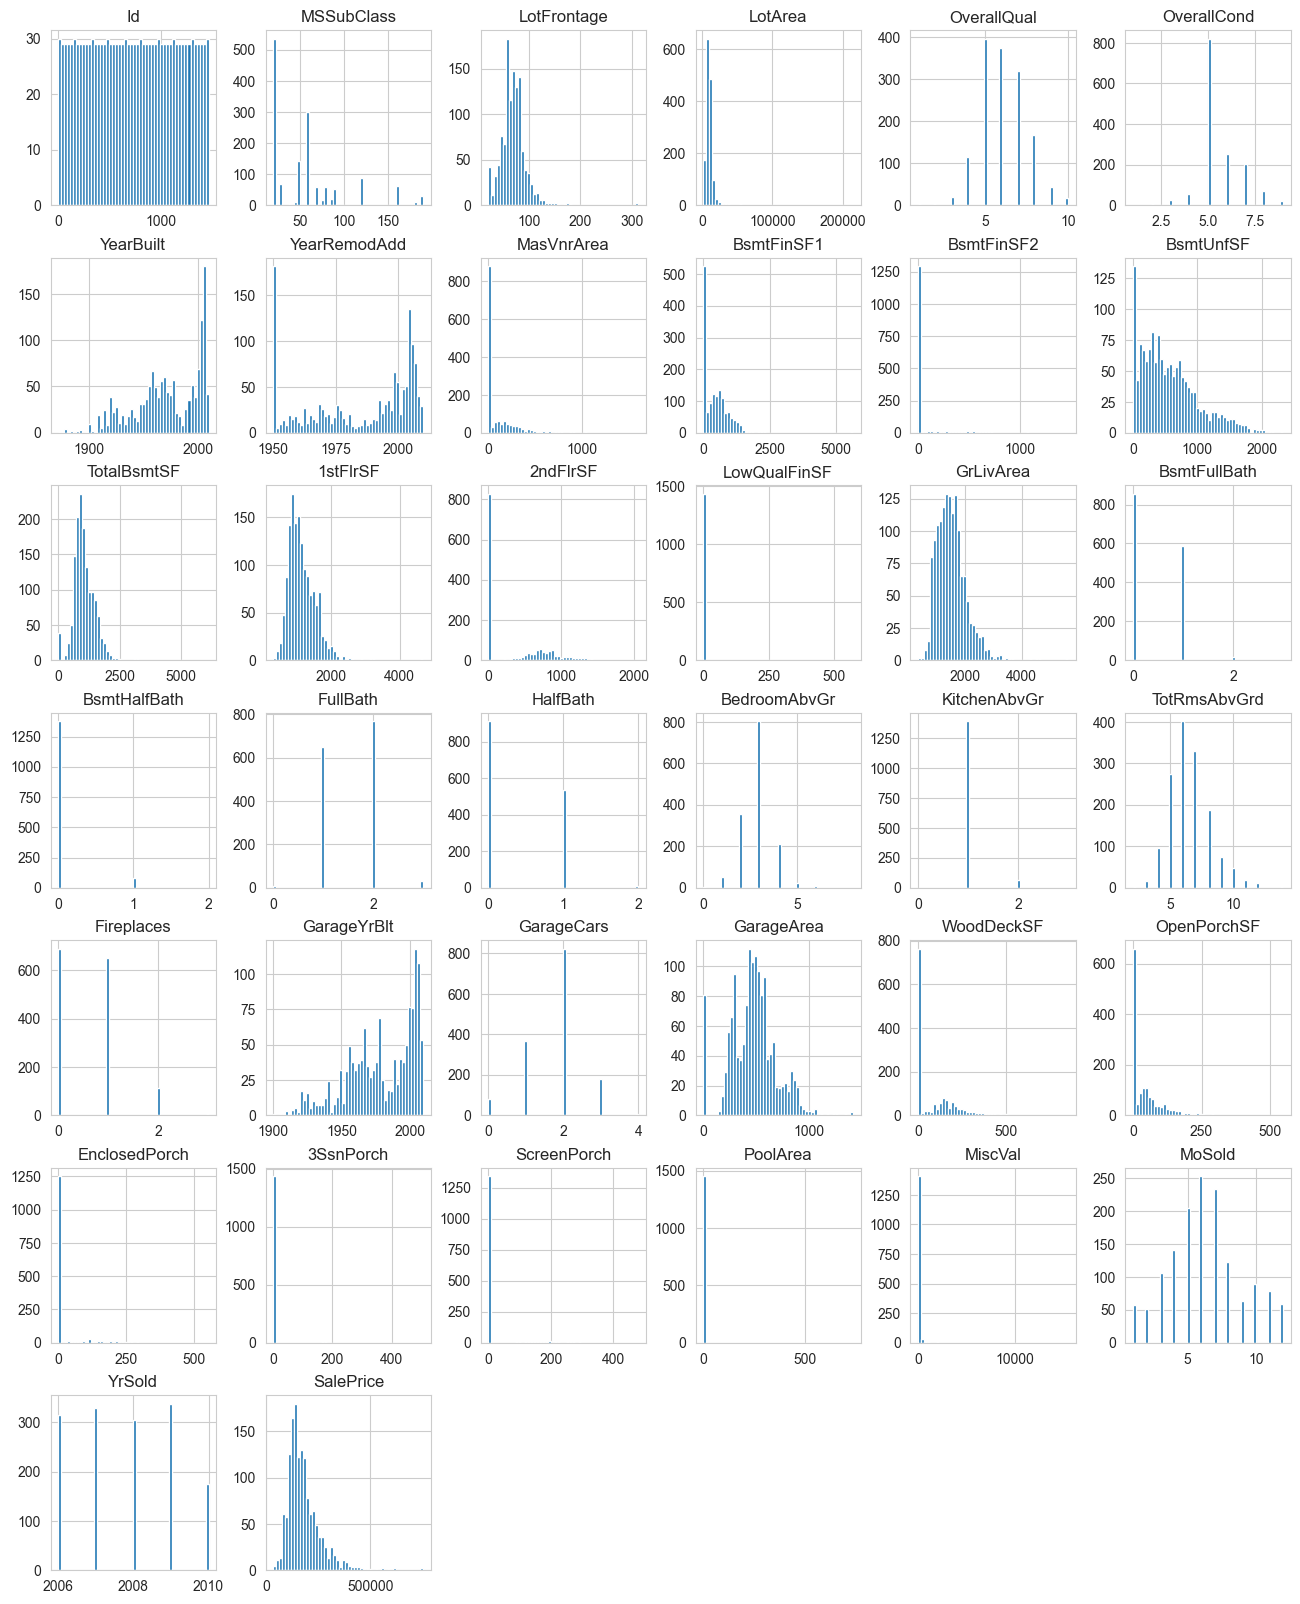

In [18]:
train.hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10)
plt.show()

1. There all a lot of missing values in the data, which some of them are not missing values, but they are actually a category. For example, the missing values in the `Alley` column means that the house does not have an alley access. So, we need to replace the missing values with `None` for these columns.
2. If there is still missing values in the data, we need to handle them based on distributions.

## Data Preparation

In [19]:
def handle_missing_data(df):
    columns_to_drop = ['Utilities', 'PoolQC', 'MiscFeature', 'Alley']
    df = df.drop(columns_to_drop, axis=1)
    
    fill_none_cols = ['Fence', 'FireplaceQu', 'MasVnrType', 'MSSubClass', 
                      'GarageType', 'GarageFinish', 'GarageQual', 
                      'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                      'BsmtFinType1', 'BsmtFinType2']
    for col in fill_none_cols:
        df[col] = df[col].fillna("None")

    fill_zero_cols = ['MasVnrArea', 'GarageYrBlt', 'GarageArea', 
                      'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 
                      'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
    for col in fill_zero_cols:
        df[col] = df[col].fillna(0)
    
    fill_mode_cols = ['KitchenQual', 'Electrical', 'SaleType', 
                      'Exterior1st', 'Exterior2nd', 'MSZoning']
    for col in fill_mode_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    # Special Cases
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median()) # fill with median
    df["Functional"] = df["Functional"].fillna("Typ") # data description says NA means typical

    return df


In [20]:
# merge train and test as all_data, and drop the ID and SalePrice columns
all_data = pd.concat([train.drop(['Id', 'SalePrice'], axis=1), test.drop(['Id'], axis=1)], axis=0)

display(all_data.head(), all_data.shape)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


(2919, 79)

In [21]:
all_data = handle_missing_data(all_data)

In [22]:
display(all_data.head(), all_data.shape)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,0,12,2008,WD,Normal


(2919, 75)

In [23]:
def add_new_features(df):
    new_features_dict = {
        'Total_SF': ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'],
        'Total_Bathrooms': ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'],
        'Total_Porch_SF': ['OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF'],
        'Total_Square_Feet': ['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF'],
        'Total_Quality': ['OverallQual', 'OverallCond'],
    }

    for new_feature, old_features in new_features_dict.items():
        if new_feature == 'Total_Bathrooms':
            df[new_feature] = df[old_features[0]] + (0.5 * df[old_features[1]]) + df[old_features[2]] + (0.5 * df[old_features[3]])
        else:
            df[new_feature] = df[old_features].sum(axis=1)
    
    return df


In [24]:
all_data = add_new_features(all_data)

display(all_data.head(), all_data.shape)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Total_SF,Total_Bathrooms,Total_Porch_SF,Total_Square_Feet,Total_Quality
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,0,2,2008,WD,Normal,2566.0,3.5,61,2416.0,12
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,0,5,2007,WD,Normal,2524.0,2.5,298,2240.0,14
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,0,9,2008,WD,Normal,2706.0,3.5,42,2272.0,12
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,0,2,2006,WD,Abnorml,2473.0,2.0,307,1933.0,12
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,0,12,2008,WD,Normal,3343.0,3.5,276,2853.0,13


(2919, 80)

In [25]:
all_data = pd.get_dummies(all_data, drop_first=True, dummy_na=True, dtype=int)

In [26]:
display(all_data.head(), all_data.shape)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Total_SF,Total_Bathrooms,Total_Porch_SF,Total_Square_Feet,Total_Quality,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Pave,Street_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtQual_nan,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtExposure_nan,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HeatingQC_nan,CentralAir_Y,CentralAir_nan,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Functional_nan,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageType_nan,GarageFinish_None,Gar

(2919, 293)

## Modeling

In [27]:
train_cleaned = all_data[:train.shape[0]]
test_cleaned = all_data[train.shape[0]:]

display(train_cleaned.head(), train_cleaned.shape)
display(test_cleaned.head(), test_cleaned.shape)



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Total_SF,Total_Bathrooms,Total_Porch_SF,Total_Square_Feet,Total_Quality,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Pave,Street_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtQual_nan,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtExposure_nan,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HeatingQC_nan,CentralAir_Y,CentralAir_nan,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Functional_nan,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageType_nan,GarageFinish_None,Gar

(1460, 293)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Total_SF,Total_Bathrooms,Total_Porch_SF,Total_Square_Feet,Total_Quality,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Pave,Street_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtQual_nan,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtExposure_nan,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HeatingQC_nan,CentralAir_Y,CentralAir_nan,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Functional_nan,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageType_nan,GarageFinish_None,Gar

(1459, 293)

In [28]:
# find the column that is not in test_cleaned but in train_cleaned
test_cleaned.columns.difference(train_cleaned.columns)

Index([], dtype='object')

### Random Forest Regressor

In [29]:
# data split
from sklearn.model_selection import train_test_split
X = train_cleaned
y = np.log(train['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1168, 293) (292, 293) (1168,) (292,)


In [128]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Let's try Random Forest Regressor
# Define the parameter grid for Random Search
param_grid = {
    'n_estimators': randint(100, 1000),         # Randomly select a value between 100 and 1000 for n_estimators
    'max_depth': randint(1, 10),                 # Randomly select a value between 1 and 10 for max_depth
    'min_samples_split': randint(2, 20),         # Randomly select a value between 2 and 20 for min_samples_split
    'min_samples_leaf': randint(1, 10),          # Randomly select a value between 1 and 10 for min_samples_leaf
    'max_features': ['auto', 'sqrt']             # Randomly select either 'auto' or 'sqrt' for max_features
}

# Initialize the Random Forest Regressor model
rfr = RandomForestRegressor()

# Perform random search with cross-validation
model_rfr = RandomizedSearchCV(scoring='neg_mean_squared_error', estimator=rfr, 
                                   param_distributions=param_grid, n_iter=50, n_jobs=-1, cv=3,
                                     random_state=666)
model_rfr.fit(X_train, y_train)  # Fit the random search to the training data

# Print the rf best parameters and best score
print("Best Parameters:", model_rfr.best_params_)
print("Best Negative MSE:", model_rfr.best_score_)


c:\Users\yuyum\.kaggle\kaggle-house-price-prediction\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 136}
Best Negative MSE: -0.021149694872527134


In [129]:
from sklearn.metrics import mean_squared_error
# Create the best random forest model
rfr_model = RandomForestRegressor(random_state=666, **model_rfr.best_params_)

# Train the model
rfr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rfr = rfr_model.predict(X_test)

# Print r-squared
r2_train_rfr = rfr_model.score(X_train, y_train)
r2_test_rfr = rfr_model.score(X_test, y_test)
print('R² of Best Random Forest Regressor on training set: {:.3f}'.format(r2_train_rfr))
print('R² of Best Random Forest Regressor on test set: {:.3f}'.format(r2_test_rfr))

# Print MSE
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print("Mean Squared Error:", mse_rfr)

c:\Users\yuyum\.kaggle\kaggle-house-price-prediction\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R² of Best Random Forest Regressor on training set: 0.961
R² of Best Random Forest Regressor on test set: 0.863
Mean Squared Error: 0.01957911897441438


### XGBoost Regressor

In [131]:
# Let's try XGBoost
from xgboost import XGBRegressor

# Define the parameter grid for Random Search
param_grid = {
    'n_estimators': randint(100, 1000),         # Randomly select a value between 100 and 1000 for n_estimators
    'max_depth': randint(1, 10),                 # Randomly select a value between 1 and 10 for max_depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], # Randomly select a value from the list for learning_rate
    'subsample': [0.3, 0.5, 0.7, 0.9, 1.0],       # Randomly select a value from the list for subsample
    'colsample_bytree': [0.3, 0.5, 0.7, 0.9, 1.0], # Randomly select a value from the list for colsample_bytree
    'gamma': [0, 1, 2, 3, 4]                      # Randomly select a value from the list for gamma
}

# Initialize the XGBoost Regressor model
xgb = XGBRegressor()

# Perform random search with cross-validation
model_xgb = RandomizedSearchCV(scoring='neg_mean_squared_error', estimator=xgb,
                                      param_distributions=param_grid, n_iter=50, n_jobs=-1, cv=3,
                                        random_state=666)
model_xgb.fit(X_train, y_train)  # Fit the random search to the training data

# Print the rf best parameters and best score
print("Best Parameters:", model_xgb.best_params_)
print("Best Negative MSE:", model_xgb.best_score_)
print("Best XGBoost Model:", model_xgb.best_estimator_)
print("Best XGBoost Model:", model_xgb.best_estimator_.get_params())

# Create the best XGBoost model
xgb_model = XGBRegressor(random_state=666, **model_xgb.best_params_)
# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Print r-squared
r2_train_xgb = xgb_model.score(X_train, y_train)
r2_test_xgb = xgb_model.score(X_test, y_test)
print('R² of Best XGBoost Regressor on training set: {:.3f}'.format(r2_train_xgb))
print('R² of Best XGBoost Regressor on test set: {:.3f}'.format(r2_test_xgb))

# Print MSE
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error:", mse_xgb)

Best Parameters: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 906, 'subsample': 0.3}
Best Negative MSE: -0.016269863935680404
Best XGBoost Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=906, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Best XGBoost Model: {'objective': 'reg:squarederror', 'base_score': None

### LightGBM Regressor

In [132]:
### LightGBM Regressor
from lightgbm import LGBMRegressor

# Define the parameter grid for Random Search
param_grid = {
    'n_estimators': [100, 500, 1000, 1500],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [-1, 3, 5, 10],
    'num_leaves': [31, 50, 100, 150],
    'min_data_in_leaf': [20, 30, 50, 100],
    'feature_fraction': [0.6, 0.8, 1.0],
    'bagging_fraction': [0.8, 0.9, 1.0],
    'bagging_freq': [0, 2, 5],
    'lambda_l1': [0, 0.1, 0.5],
    'lambda_l2': [0, 0.01, 0.1],
}


# Initialize the LightGBM Regressor model
lgbm = LGBMRegressor(device="gpu", gpu_platform_id=1, gpu_device_id=1) # Use GPU

# Perform random search with cross-validation
model_lgbm = RandomizedSearchCV(scoring='neg_mean_squared_error', estimator=lgbm,
                                        param_distributions=param_grid, n_iter=50, n_jobs=-1, cv=3,
                                            random_state=666)                   
model_lgbm.fit(X_train, y_train)  # Fit the random search to the training data

# Print the rf best parameters and best score
print("Best Parameters:", model_lgbm.best_params_)
print("Best Negative MSE:", model_lgbm.best_score_)
print("Best LightGBM Model:", model_lgbm.best_estimator_)
print("Best LightGBM Model:", model_lgbm.best_estimator_.get_params())

# Create the best LightGBM model
lgbm_model = LGBMRegressor(random_state=666, **model_lgbm.best_params_)
# Train the model
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Print r-squared
r2_train_lgbm = lgbm_model.score(X_train, y_train)
r2_test_lgbm = lgbm_model.score(X_test, y_test)

print('R² of Best LightGBM Regressor on training set: {:.3f}'.format(r2_train_lgbm))
print('R² of Best LightGBM Regressor on test set: {:.3f}'.format(r2_test_lgbm))

# Print MSE
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
print("Mean Squared Error:", mse_lgbm)


c:\Users\yuyum\.kaggle\kaggle-house-price-prediction\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\yuyum\.kaggle\kaggle-house-price-prediction\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\yuyum\.kaggle\kaggle-house-price-prediction\.venv\Lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "c:\Users\yuyum\.kaggle\kaggle-house-p

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Best Parameters: {'num_leaves': 150, 'n_estimators': 1000, 'min_data_in_leaf': 20, 'max_depth': 5, 'learning_rate': 0.01, 'lambda_l2': 0.01, 'lambda_l1': 0, 'feature_fraction': 0.6, 'bagging_freq': 5, 'bagging_fraction': 1.0}
Best Negative MSE: -0.016864475135837626
Best LightGBM Model: LGBMRegressor(bagging_fraction=1.0, 

## Evaluation

In [133]:
# build a function to get the metrics for a regression model
def get_reg_metrics(model, X_train, X_test, y_train, y_test):
    # Make predictions
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_test_pred) # Average squared difference between predicted and actual values for the test set
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)
    stability = min([(r2_train/r2_test),(r2_test/r2_train)])

    return {"MSE": mse, "R2_train": r2_train, "R2_test": r2_test, "Stability": stability}

In [134]:
rfr_metrics = get_reg_metrics(rfr_model, X_train, X_test, y_train, y_test)
xgb_metrics = get_reg_metrics(xgb_model, X_train, X_test, y_train, y_test)
lgbm_metrics = get_reg_metrics(lgbm_model, X_train, X_test, y_train, y_test)

In [135]:
# Create a list of dictionaries containing model names and their metrics
all_reg_metrics = [
    {"Model": "Random Forest Regressor", **rfr_metrics},
    {"Model": "XGBoost Regressor", **xgb_metrics},
    {"Model": "LightGBM Regressor", **lgbm_metrics}
]

# Create a dataframe from the list of dictionaries
all_reg_metrics_df = pd.DataFrame(all_reg_metrics)
all_reg_metrics_df

,Model,MSE,R2_train,R2_test,Stability
0,Random Forest Regressor,0.019579,0.961337,0.862700,0.897396
1,XGBoost Regressor,0.016475,0.977154,0.884467,0.905147
2,LightGBM Regressor,0.015531,0.971280,0.891084,0.917433


lightGBM is the best model since it has the lowest RMSE while having relatively high values in other metrics.

In [136]:
model_lgbm.best_estimator_.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'num_leaves': 150,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'device': 'gpu',
 'gpu_platform_id': 1,
 'gpu_device_id': 1,
 'min_data_in_leaf': 20,
 'lambda_l2': 0.01,
 'lambda_l1': 0,
 'feature_fraction': 0.6,
 'bagging_freq': 5,
 'bagging_fraction': 1.0}

In [137]:
X_test.shape

(292, 293)

In [138]:
test_cleaned.shape

(1459, 293)

In [139]:
y_pred_lgbm_final = np.exp(lgbm_model.predict(test_cleaned))
print(y_pred_lgbm_final)

[129849.55485588 163585.66115494 177112.54672612 ... 159748.59902876
 119838.97897123 216808.37164655]


In [140]:
submission = pd.DataFrame()
submission ['Id'] = test['Id']
submission ['SalePrice'] = y_pred_lgbm_final
submission .to_csv('submission.csv',index=False)

In [144]:
display(submission.head(10),submission.tail(3), submission.shape)

,Id,SalePrice
0,1461,129849.554856
1,1462,163585.661155
2,1463,177112.546726
3,1464,191274.076311
4,1465,187778.843081
5,1466,180411.227843
6,1467,176672.102404
7,1468,166349.371922
8,1469,186479.840801
9,1470,125941.234437


,Id,SalePrice
1456,2917,159748.599029
1457,2918,119838.978971
1458,2919,216808.371647


(1459, 2)

## Secone Try

## Data Preparation

In [30]:
display(all_data.head(), all_data.shape)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Total_SF,Total_Bathrooms,Total_Porch_SF,Total_Square_Feet,Total_Quality,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Pave,Street_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtQual_nan,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtExposure_nan,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HeatingQC_nan,CentralAir_Y,CentralAir_nan,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Functional_nan,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageType_nan,GarageFinish_None,Gar

(2919, 293)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
### LightGBM Regressor
# Define the parameter grid for Random Search
param_grid = {
    'n_estimators': [100, 500, 1000, 1500],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [-1, 3, 5, 10],
    'num_leaves': [31, 50, 100, 150],
    'min_data_in_leaf': [20, 30, 50, 100],
    'feature_fraction': [0.6, 0.8, 1.0],
    'bagging_fraction': [0.8, 0.9, 1.0],
    'bagging_freq': [0, 2, 5],
    'lambda_l1': [0, 0.1, 0.5],
    'lambda_l2': [0, 0.01, 0.1],
}


# Initialize the LightGBM Regressor model
lgbm = LGBMRegressor(device="gpu", gpu_platform_id=1, gpu_device_id=1) # Use GPU

# Perform random search with cross-validation
model_lgbm = RandomizedSearchCV(scoring='neg_mean_squared_error', estimator=lgbm,
                                        param_distributions=param_grid, n_iter=50, n_jobs=-1, cv=3,
                                            random_state=666)                   
model_lgbm.fit(X_train, y_train)  # Fit the random search to the training data

# Print the rf best parameters and best score
print("Best Parameters:", model_lgbm.best_params_)
print("Best Negative MSE:", model_lgbm.best_score_)
print("Best LightGBM Model:", model_lgbm.best_estimator_)
print("Best LightGBM Model:", model_lgbm.best_estimator_.get_params())

# Create the best LightGBM model
lgbm_model = LGBMRegressor(random_state=666, **model_lgbm.best_params_)
# Train the model
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Print r-squared
r2_train_lgbm = lgbm_model.score(X_train, y_train)
r2_test_lgbm = lgbm_model.score(X_test, y_test)

print('R² of Best LightGBM Regressor on training set: {:.3f}'.format(r2_train_lgbm))
print('R² of Best LightGBM Regressor on test set: {:.3f}'.format(r2_test_lgbm))

# Print MSE
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
print("Mean Squared Error:", mse_lgbm)